In [1]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import os

#all models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#accuracy measures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import numpy as np

In [2]:
#list of ODI teams with their ICC rank value
teams_dict = {'australia':15, 'india':18, 'bangladesh':20, 'srilanka':13, 'southafrica':16, 'pakistan':14, 
            'zimbabwe':9,'newzealand':17, 'westindies':12, 'england':19, 'afghanistan':11, 'ireland':10, 
            'netherlands':8,'oman':7, 'scotland':6, 'nepal':5, 'namibia':4, 'uae':3, 'usa':2, 'papuanewguinea':1
             }

#list of other t20 teams but this does not match the teams that we have in the dataset
teams_t20={'Pakistan': '1', 'Australia': '2', 'England': '3', 'India': '4', 'South Africa': '5', 'New Zealand': '6', 
           'Afghanistan': '7', 'Sri Lanka': '8', 'Bangladesh': '9', 'West Indies': '10', 'Zimbabwe': '11', 
           'Ireland': '12', 'Scotland': '13', 'UAE': '14', 'Nepal': '15', 'Netherlands': '16', 'PNG': '17', 
           'Oman': '18', 'Namibia': '19', 'Singapore': '20', 'Qatar': '21', 'Canada': '22', 'Hong Kong': '23', 
           'Jersey': '24', 'Saudi Arabia': '25', 'Italy': '26', 'Kuwait': '27', 'Kenya': '28', 'Denmark': '29', 
           'Bermuda': '30', 'Malaysia': '31', 'Germany': '32', 'USA': '33', 'Uganda': '34', 'Botswana': '35', 
           'Ghana': '36', 'Norway': '37', 'Austria': '38', 'Guernsey': '39', 'Romania': '40', 'Nigeria': '41', 
           'Sweden': '42', 'Spain': '43', 'Tanzania': '44', 'Cayman Islands': '45', 'Philippines': '46', 
           'Bahrain': '47', 'Argentina': '48', 'France': '49', 'Vanuatu': '50', 'Belize': '51', 'Luxembourg': '52', 
           'Malawi': '53', 'Peru': '54', 'Fiji': '55', 'Panama': '56', 'Belgium': '57', 'Samoa': '58', 'Japan': '59',
           'Costa Rica': '60', 'Mexico': '61', 'Hungary': '62', 'Bulgaria': '63', 'Czech Republic': '64', 
           'Israel': '65', 'Thailand': '66', 'Portugal': '67', 'Finland': '68', 'South Korea': '69', 
           'Isle of Man': '70', 'Chile': '71', 'Bhutan': '72', 'Mozambique': '73', 'Sierra Leone': '74', 
           'Brazil': '75', 'Maldives': '76', 'St Helena': '77', 'Malta': '78', 'Myanmar': '79', 
           'Indonesia': '80', 'China': '81', 'Gambia': '82', 'Gibraltar': '83', 'Swaziland': '84', 
           'Rwanda': '85', 'Lesotho': '86'}

In [3]:
#load all the rank files csv
path_for_rank_files = os.path.join(os.getcwd(), 'fantasy_game/dataset')

bbl = pd.read_csv(path_for_rank_files + '/bbl.csv')
bpl = pd.read_csv(path_for_rank_files + '/bpl.csv')
icc_women_odi = pd.read_csv(path_for_rank_files + '/icc-women-odi.csv')
icc_women_t20 = pd.read_csv(path_for_rank_files + '/icc-women-t20.csv')
ipl = pd.read_csv(path_for_rank_files + '/ipl.csv')
mzansi = pd.read_csv(path_for_rank_files + '/mzansi.csv')
psl = pd.read_csv(path_for_rank_files + '/psl.csv')
t10 = pd.read_csv(path_for_rank_files + '/t10-league.csv')

In [4]:
#reverse the ranking to make meaningful score
def reverse_score(dataframe):
    score = [dataframe['Score'][ind] for ind in dataframe.index]
    score.reverse()
    dataframe['score_processed'] = score
    dataframe = dataframe.drop(['Score'], axis=1)
    return dataframe

#convert dataframe into dictionary
def convert_to_dict(dataframe):
    dic = {}
    for ind in dataframe.index:
        team, score = dataframe['Teams'][ind],dataframe['score_processed'][ind] 
        team = team.lower().replace(" ", '')
        dic[team] = score
    
    return dic


In [5]:
#convert to score in reverse order and then transform into dictionary
bbl = reverse_score(bbl)
bbl_dict = convert_to_dict(bbl)

bpl = reverse_score(bpl)
bpl_dict = convert_to_dict(bpl) 

icc_women_odi = reverse_score(icc_women_odi)
icc_women_odi_dict = convert_to_dict(icc_women_odi) 

icc_women_t20 = reverse_score(icc_women_t20)
icc_womend_t20_dict = convert_to_dict(icc_women_t20) 

ipl = reverse_score(ipl)
ipl_dict = convert_to_dict(ipl) 

mzansi = reverse_score(mzansi)
mzansi_dict = convert_to_dict(mzansi) 

psl = reverse_score(psl)
psl_dict = convert_to_dict(psl) 

t10 = reverse_score(t10)
t10_dict = convert_to_dict(t10) 

In [37]:
ipl_dict

{'mumbaiindians': 8,
 'chennaisuperkings': 7,
 'delhicapitals': 6,
 'sunrisershyderabad': 5,
 'kolkataknightriders': 4,
 'kingsxipunjab': 3,
 'rajasthanroyals': 2,
 'royalchallengersbangalore': 1}

In [6]:
#set paths for dataset loading
path = os.path.join(os.getcwd(), 'final_df.xlsx')
#file_path = os.path.join(path, 'final_df.xlsx')
print(path)

/Users/mustakimsunny/Desktop/ML/final_df.xlsx


In [7]:
#read files and see data types
final_data = pd.read_excel(path)

In [8]:
#drop unnecessary columns, first argument = data, second argument = all the cols needed to be dropped
def drop_cols(dataframe,*arg):
    columns = list(arg)
    dataframe = dataframe.drop(columns, axis=1)
    return dataframe

#convert matchTime to datetime
def convert_to_datetime(dataframe, date_col):
    dataframe[date_col] = pd.to_datetime(dataframe[date_col])
    return dataframe


#seperating the hour from the match time and adding it into the dataframe
def extract_and_add_hour(dataframe,date_col):
    hour = list(dataframe[date_col].dt.hour)
    dataframe['hour'] = hour
    return dataframe

#match weight calculation
def match_weight(team1, team2, dictionary):
    if team1 in dictionary and team2 in dictionary:
        normalized_sum = dictionary[team1]/len(dictionary) + dictionary[team2]/len(dictionary)
        weight = normalized_sum/2
        return weight
    else:
        return None
    
#train test split
def split_train_test(dataframe, target):
    train_set, test_set = train_test_split(dataframe, test_size=0.2, random_state=42)
    X_train, X_test = train_set.drop(target, axis=1), test_set.drop(target, axis=1)
    y_train, y_test = train_set[target], test_set[target]
    
    return X_train, X_test, y_train, y_test

In [9]:
#creating a pipeline for scaling and normalization, this will be helpful for future scaling, we can just create these 
#pipelines which will consist of all different types of cleaning functions. In goes noisy data, out comes the cleanes processed data



num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
    ])


NameError: name 'FunctionTransformer' is not defined

In [10]:
#select model, fit and predict
#then measure different accuracy score for each of 'em

def fit_predict(X_train, X_test, y_train, y_test):
    predicted_vals = []
    algorithms = [LinearRegression(), SVC(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),RandomForestRegressor(n_estimators=80,max_features='sqrt'),RandomForestClassifier()]
    for algorithm in algorithms:
        model = algorithm
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predicted_vals.append(y_pred)
        print('Model: ', model)
        print('\n')
        print('mean squared error: ', mean_squared_error(y_test, y_pred))
        print('explained variance score: ', explained_variance_score(y_test, y_pred))
        print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
        print('median squared error: ', median_absolute_error(y_test, y_pred))
        print('r2 score: ', r2_score(y_test, y_pred))

        print('---------------------------------------------')
        


In [11]:
df_initial_model = final_data

In [12]:
#drop columns that are not intended to be used for now
df_initial_model = drop_cols(df_initial_model,'match_id','TotalContestPerMatch', 'Unnamed: 10')

#convert match time column to datetime for further processing
df_initial_model = convert_to_datetime(df_initial_model,'matchTime')

#extract the hour values and as an additional column
df_initial_model = extract_and_add_hour(df_initial_model,'matchTime')

#now that the hour is in the dataframe, there is no need of the matchtime column, so drop it
df_initial_model = drop_cols(df_initial_model,'name', 'matchTime')

# fill missing values with mean column values
df_initial_model.fillna(df_initial_model.mean(), inplace=True)

In [13]:
#split into basic train, test 
X_train, X_test, y_train, y_test = split_train_test(df_initial_model, 'total_contest_given')

In [14]:
#convert target col to int
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')

In [15]:
#check correlation 
corr_matrix = df_initial_model.corr()
print(corr_matrix['total_contest_given'].sort_values(ascending=False))

total_contest_given    1.000000
TotalWinningAMount     0.837936
Total Entry Amount     0.818158
ProfitMergin           0.449482
TotalSeat              0.249703
TotalTeamCapacity     -0.004524
hour                  -0.104976
Name: total_contest_given, dtype: float64


In [17]:

fit_predict(X_train, X_test, y_train, y_test)


Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


mean squared error:  3.5815235817976987
explained variance score:  0.7165737018761251
mean absolute error:  1.3602353698945797
median squared error:  0.8290505378445037
r2 score:  0.7161799460174101
---------------------------------------------
Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


mean squared error:  3.6923076923076925
explained variance score:  0.7089200557063879
mean absolute error:  1.1076923076923078
median squared error:  1.0
r2 score:  0.7074007905805562
---------------------------------------------
Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   mu

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


mean squared error:  2.853846153846154
explained variance score:  0.7746376505783992
mean absolute error:  0.8076923076923077
median squared error:  0.0
r2 score:  0.7738451943862216
---------------------------------------------


In [18]:
#looks like RandomForestRegressor giving the best answer, let's calculate with cross validation
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(n_estimators=80,max_features='sqrt')
cv_score = cross_val_score(rf_reg, X_train, y_train, scoring='r2', cv=10)

print(cv_score) 
print("Mean: ", cv_score.mean())

[0.73534309 0.8425786  0.72609485 0.83521482 0.87840668 0.7977204
 0.74320537 0.84578732 0.78560299 0.64336969]
Mean:  0.7833323808776809


In [19]:
#stratified sampling

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, random_state=42)
rf_reg = RandomForestRegressor(n_estimators=80,max_features='sqrt')
r2 = []

for train_index, test_index in skfolds.split(X_train, y_train):
    #clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    
    
    
    rf_reg.fit(X_train_folds, y_train_folds)
    y_pred = rf_reg.predict(X_test_fold)
    
    r2.append(r2_score(y_test_fold, y_pred))
    
print(sum(r2)/len(r2))

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7873411117586028


In [20]:
#build another dataset with hype values
hypes = []
dict_of_dicts = {'bbl_dict': bbl_dict,
     'bpl_dict': bpl_dict, 
     'icc_women_odi_dict': icc_women_odi_dict, 
     'icc_womend_t20_dict': icc_womend_t20_dict,
     'ipl_dict': ipl_dict,
     'mzansi_dict': mzansi_dict,
     'psl_dict': psl_dict,
     't10_dict': t10_dict,
     'teams_dict' : teams_dict}

i = 0
x = {}
teams_with_hype = pd.DataFrame()
for teams in final_data['name']:
    i += 1
    teams= teams.replace('vs', ',')
    teams = teams.replace(" ", '')
    team1,team2 = teams.lower().split(',')
    
    for key,val in dict_of_dicts.items():
        if team1 in dict_of_dicts[key] and team2 in dict_of_dicts[key]:
            #print(team1 + ' vs ' + team2 + ' found in ' + key)
            #print(match_weight(team1, team2,val))
            hype = match_weight(team1, team2,val)
            
            for key, val in final_data.iloc[i-1].items():
                x[key] = val
            x['hype'] = hype
            teams_with_hype = teams_with_hype.append(x, ignore_index=True)
            break

In [21]:
#drop columns that are not intended to be used for now
teams_with_hype = drop_cols(teams_with_hype,'match_id','TotalContestPerMatch', 'Unnamed: 10')

#convert match time column to datetime for further processing
teams_with_hype = convert_to_datetime(teams_with_hype,'matchTime')

#extract the hour values and as an additional column
teams_with_hype = extract_and_add_hour(teams_with_hype,'matchTime')

#now that the hour is in the dataframe, there is no need of the matchtime column, so drop it
teams_with_hype = drop_cols(teams_with_hype,'name', 'matchTime')

# fill missing values with mean column values
teams_with_hype.fillna(teams_with_hype.mean(), inplace=True)


In [22]:
teams_with_hype

ProfitMergin  Total Entry Amount  TotalSeat  TotalTeamCapacity  \
0          -370.0              1630.0      110.0              600.0   
1          -660.0               840.0       42.0              300.0   
2          -140.0              1360.0       68.0              300.0   
3          -220.0              1280.0       64.0              300.0   
4          -210.0               590.0       59.0              300.0   
..            ...                 ...        ...                ...   
420        1395.0             12735.0      530.0              530.0   
421        4585.0             32740.0     1195.0             1195.0   
422        1135.0             11955.0      315.0              315.0   
423        2385.0             22535.0      705.0              705.0   
424        1590.0             12795.0      460.0              460.0   

     TotalWinningAMount    hype  total_contest_given  hour  
0                2000.0  0.7250                  3.0  17.0  
1                1500.0  0.7250                  2.0  22.0  
2                1500.0  0.5000                  2.0  20.0  
3                1500.0  0.5625                  2.0  16.0  
4                 800.0  0.7250                  2.0  17.0  
..                  ...     ...                  ...   ...  
420             11340.0  0.7000                  7.0  17.0  
421             28155.0  0.7750                 10.0  18.0  
422             10820.0  0.9500                  5.0   9.0  
423             20150.0  0.7500                  8.0  14.0  
424             11205.0  0.9500                  6.0   8.0  

[425 rows x 8 columns]

In [23]:
#split into basic train, test 
X_train, X_test, y_train, y_test = split_train_test(teams_with_hype, 'total_contest_given')

#convert target col to int
y_test = y_test.astype('int64')
y_train = y_train.astype('int64')


In [24]:
fit_predict(X_train, X_test, y_train, y_test)


Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


mean squared error:  3.1671274072895503
explained variance score:  0.7366126469889039
mean absolute error:  1.3793634492378548
median squared error:  1.1122737008869228
r2 score:  0.7363342530169958
---------------------------------------------
Model:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


mean squared error:  5.211764705882353
explained variance score:  0.5745166271057544
mean absolute error:  1.4470588235294117
median squared error:  1.0
r2 score:  0.5661166547599843
---------------------------------------------
Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   mul

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


mean squared error:  3.211764705882353
explained variance score:  0.7345654829119904
mean absolute error:  0.8117647058823529
median squared error:  0.0
r2 score:  0.7326181642200356
---------------------------------------------


In [25]:
#looks like RandomForestRegressor giving the best answer, let's calculate with cross validation
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor(n_estimators=80,max_features='sqrt')
cv_score = cross_val_score(rf_reg, X_train, y_train, scoring='r2', cv=10)

print(cv_score) 
print("Mean: ", cv_score.mean())

[0.87826487 0.80884829 0.70844985 0.82491408 0.63411201 0.79975393
 0.84508506 0.8188041  0.89631244 0.8383132 ]
Mean:  0.8052857825903066


In [26]:
#stratified sampling

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, random_state=42)
rf_reg = RandomForestRegressor()
r2 = []

for train_index, test_index in skfolds.split(X_train, y_train):
    #clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    
    
    
    rf_reg.fit(X_train_folds, y_train_folds)
    y_pred = rf_reg.predict(X_test_fold)
    
    r2.append(r2_score(y_test_fold, y_pred))
    
print(sum(r2)/len(r2))

/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/mustakimsunny/Desktop/ML/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.8044304029624232


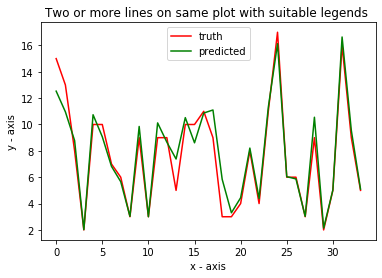

In [27]:
#plot actual VS predicted value for any model from the list in the cell above
x = []
for i in range(34):
    x.append(i)
y1 = y_test_fold
y2 = y_pred #change the index of the predicted_vals according to what model needs to be visualized

plt.plot(x, y1, label = "truth", color='red')
plt.plot(x, y2, label = "predicted", color='green')

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()

plt.show()

In [31]:
# Number of trees in random forest
n_estimators = [i for i in range(50,150,10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [32]:
n_estimators

[50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

#RandomForestRegressor()
# Build a classification task using 3 informative features





rfc = RandomForestRegressor() 

param_grid = { 
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_) 

KeyboardInterrupt: 

In [89]:
clone_rf = clone(rf_reg)

In [90]:
clone_rf.fit(X_train, y_train)
p = clone_rf.predict(X_test)

In [91]:
p

array([ 7.74,  2.03,  5.84,  3.  ,  6.55, 10.89,  7.6 ,  8.11,  6.3 ,
        5.32,  6.92,  3.03,  9.03,  4.7 ,  3.  ,  6.07, 12.34,  3.03,
        2.  ,  5.87,  3.75, 10.9 ,  6.95,  3.  ,  5.22,  5.67,  3.31,
        8.85,  8.83,  9.54,  5.95,  9.2 ,  7.31,  3.95,  7.07,  2.05,
        8.83,  9.12,  9.7 , 11.1 ,  6.71,  4.24,  2.63,  2.04,  3.  ,
        5.66,  7.8 ,  2.15,  8.58, 10.4 ,  2.  ,  8.58, 10.24,  2.99,
        3.  ,  9.08,  5.61,  2.03, 10.02,  3.  ,  8.75, 10.45,  3.16,
        4.04,  7.03,  3.  ,  5.16, 10.42,  9.3 ,  3.  , 16.54, 10.73,
        5.02,  7.95,  5.46, 11.57,  3.  ,  3.  ,  5.93,  5.06,  4.16,
        6.92,  3.04,  5.59,  2.96])

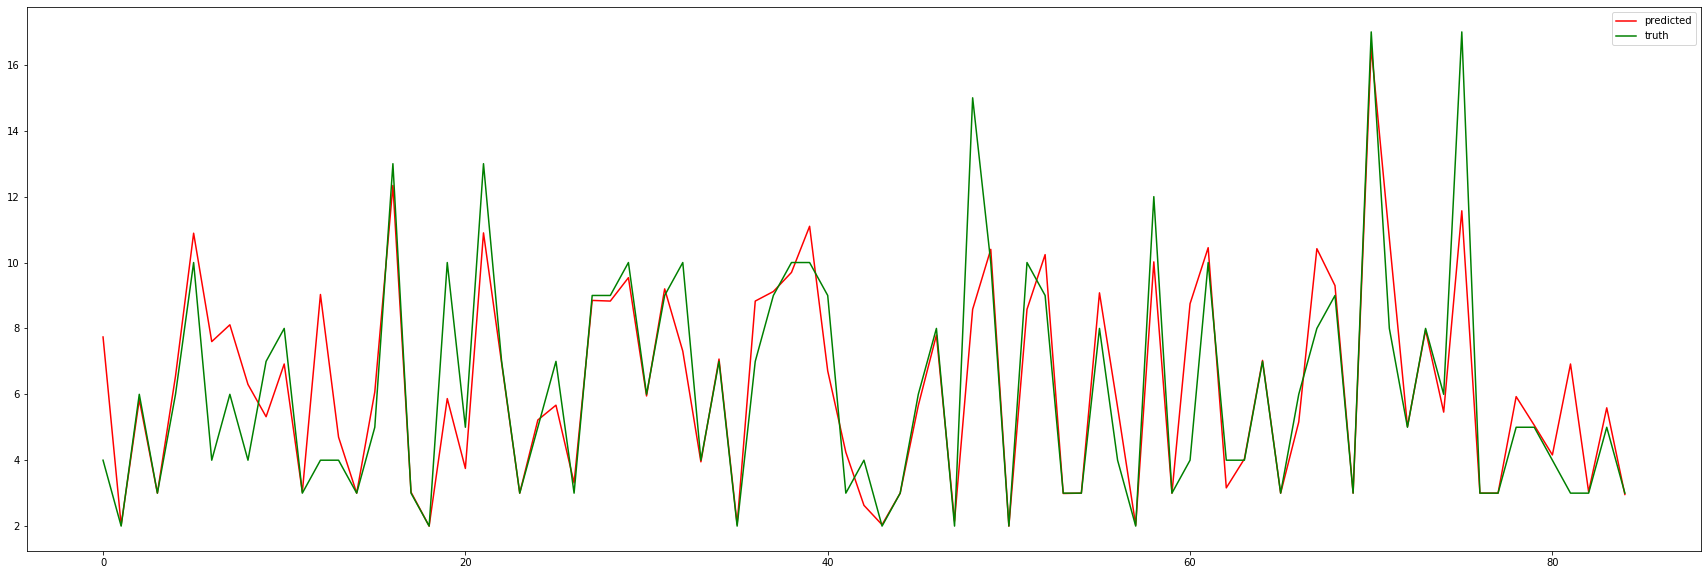

In [92]:
x = [i for i in range(85)]
plt.figure(figsize=(30,10))
plt.plot(x,p, label='predicted', color='red')
plt.plot(x,y_test, label='truth', color='green')
plt.legend()

array([ 7.84,  2.04,  5.53,  3.  ,  6.81, 11.03,  8.08,  8.41,  6.64,
        5.14,  7.07,  2.97,  9.33,  4.48,  3.  ,  5.63, 11.84,  2.99,
        2.  ,  5.51,  3.3 , 11.52,  6.58,  3.  ,  5.22,  6.14,  3.26,
        9.24,  8.62,  9.73,  5.97,  9.07,  7.34,  3.98,  6.72,  2.05,
        8.33,  9.11,  9.7 , 10.86,  6.52,  4.02,  2.58,  2.03,  3.  ,
        5.68,  7.82,  2.18, 10.02, 10.52,  2.  ,  8.62, 10.2 ,  2.99,
        3.  ,  8.74,  5.43,  2.02,  9.82,  3.  ,  8.96, 10.44,  3.2 ,
        4.06,  7.09,  3.  ,  5.38, 10.08,  9.41,  3.  , 16.98, 11.19,
        5.02,  7.77,  5.62, 11.76,  3.  ,  3.  ,  5.99,  5.02,  4.27,
        6.75,  3.03,  5.51,  3.  ])

In [58]:
y_test

417    4
75     2
176    6
30     3
357    6
      ..
94     4
374    3
57     3
124    5
24     3
Name: total_contest_given, Length: 85, dtype: int64

ProfitMergin  Total Entry Amount  TotalSeat  TotalTeamCapacity  \
417        2885.0             19000.0      650.0              650.0   
75         -150.0              1350.0       90.0              300.0   
176        4675.0             11840.0      912.0              912.0   
30         -280.0              1720.0      139.0              600.0   
357        2267.0             15407.0      401.0              401.0   
..            ...                 ...        ...                ...   
94         4455.0              7975.0      618.0             1475.0   
374         840.0             14790.0      393.0              449.0   
57          300.0              2550.0      201.0              600.0   
124        3780.0             11020.0      817.0             2150.0   
24         -840.0              1160.0       93.0              600.0   

     TotalWinningAMount    hype  hour  
417             16115.0  0.7250   9.0  
75               1500.0  0.8250  16.0  
176              7165.0  0.7500  19.0  
30               2000.0  0.6875  20.0  
357             13140.0  0.6875  16.0  
..                  ...     ...   ...  
94               3520.0  0.9750  15.0  
374             13950.0  0.8750  17.0  
57               2250.0  0.8125  20.0  
124              7240.0  0.5750  15.0  
24               2000.0  0.6250  16.0  

[85 rows x 7 columns]

In [ ]:
#2 (1st dataset)

In [ ]:
#1st - 300, 2nd - 140 (2nd dataset)

In [35]:
#len(final_data)


647

In [68]:
#1. load data, visualize, plot, stat information,correlation
#2. data cleaning : null valus fill, datetime,drop 
#3. try differenrt models - and come up with the best one
#4. go forward with the best model, hyper param tuning, cross val score, grid search 

match_id                                               name  \
0        93                              Pakistan vs Australia   
1        94                          South Africa vs Sri Lanka   
2        98  Chennai Super Kings vs Royal Challengers Banga...   
3        99       Kolkata Knight Riders vs Sunrisers Hyderabad   
4       100                              Pakistan vs Australia   

             matchTime  total_contest_given  Total Entry Amount  TotalSeat  \
0  2019-03-22 17:00:00                  3.0              1630.0      110.0   
1  2019-03-22 22:00:00                  2.0               840.0       42.0   
2  2019-03-23 20:30:00                  2.0              1360.0       68.0   
3  2019-03-24 16:30:00                  2.0              1280.0       64.0   
4  2019-03-24 17:00:00                  2.0               590.0       59.0   

   TotalWinningAMount  TotalTeamCapacity  ProfitMergin  TotalContestPerMatch  \
0              2000.0              600.0        -370.0                     2   
1              1500.0              300.0        -660.0                     1   
2              1500.0              300.0        -140.0                     1   
3              1500.0              300.0        -220.0                     1   
4               800.0              300.0        -210.0                     1   

   Unnamed: 10  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN